In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [51]:
df = pd.read_csv('../Dataset/iRent去識別化數據(僅供本次賽事使用)_20220627/iRent顧客租車交易資料.csv', encoding= 'big5')
#df['Date'] = pd.to_datetime(df['iRent_7']).dt.date
print(df.shape)
df.head()

(403331, 15)


,iRent_1,iRent_2,iRent_3,iRent_4,iRent_5,iRent_6,iRent_7,iRent_8,iRent_9,iRent_10,iRent_11,iRent_12,iRent_13,iRent_14,iRent_15
0,A10002139,31-35,M,台北市,文山區,40366241,2021/04/01 18:06:14,516,2021/04/01 18:10:20,2021/04/01 22:12:29,40.0,RCF-6972,TOYOTA/PRIUSc,car,201904
1,A10002478,31-35,M,台北市,中正區,73561565,2021/04/11 11:40:08,37,2021/04/11 11:42:09,2021/04/11 12:06:09,5.5,EWA-0325,KYMCO/MANY-110,motor,201909
2,A10002478,31-35,M,台北市,中正區,113588372,2021/04/24 12:05:24,19,2021/04/24 12:07:29,2021/04/24 12:19:04,2.5,EWH-7300,KYMCO/MANY-110,motor,201911
3,A10002651,31-35,M,新北市,永和區,79976100,2021/04/13 13:36:36,717,2021/04/13 13:40:21,2021/04/13 16:41:53,90.0,RCK-8260,TOYOTA/YARIS,car,201901
4,A10002984,31-35,M,台北市,文山區,58906802,2021/04/06 19:30:49,284,2021/04/06 19:42:04,2021/04/06 20:46:05,45.0,RCF-8171,TOYOTA/PRIUSc,car,201906


In [52]:
df['Hour'] = pd.to_datetime(df['iRent_9']).dt.hour
df.head()

,iRent_1,iRent_2,iRent_3,iRent_4,iRent_5,iRent_6,iRent_7,iRent_8,iRent_9,iRent_10,iRent_11,iRent_12,iRent_13,iRent_14,iRent_15,Hour
0,A10002139,31-35,M,台北市,文山區,40366241,2021/04/01 18:06:14,516,2021/04/01 18:10:20,2021/04/01 22:12:29,40.0,RCF-6972,TOYOTA/PRIUSc,car,201904,18
1,A10002478,31-35,M,台北市,中正區,73561565,2021/04/11 11:40:08,37,2021/04/11 11:42:09,2021/04/11 12:06:09,5.5,EWA-0325,KYMCO/MANY-110,motor,201909,11
2,A10002478,31-35,M,台北市,中正區,113588372,2021/04/24 12:05:24,19,2021/04/24 12:07:29,2021/04/24 12:19:04,2.5,EWH-7300,KYMCO/MANY-110,motor,201911,12
3,A10002651,31-35,M,新北市,永和區,79976100,2021/04/13 13:36:36,717,2021/04/13 13:40:21,2021/04/13 16:41:53,90.0,RCK-8260,TOYOTA/YARIS,car,201901,13
4,A10002984,31-35,M,台北市,文山區,58906802,2021/04/06 19:30:49,284,2021/04/06 19:42:04,2021/04/06 20:46:05,45.0,RCF-8171,TOYOTA/PRIUSc,car,201906,19


### Feature Engineering

In [53]:
# 年齡用亂數打亂
# 訂單金額算總數
# 租用開始時間(以小時代替)

#df_amount = df.groupby(by = 'iRent_1', as_index= False)['iRent_11'].mean()

#df_recency = df.groupby(by = 'iRent_1', as_index= False)['Date'].max()

#df_recency.columns = ['CustomerID', 'LastPurchaseDate']

monetary_df = df.groupby(by='iRent_1', as_index=False)['iRent_8'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df

,CustomerID,Monetary
0,A10002139,516
1,A10002478,56
2,A10002651,717
3,A10002984,284
4,A10003278,6492
...,...,...
122305,Z103337827,144
122306,Z103337999,394
122307,Z103338464,4224
122308,Z103340951,18


In [54]:
usagehour_df = df.groupby(by='iRent_1', as_index=False)['Hour'].mean()
usagehour_df.columns = ['CustomerID', 'usagehour']
usagehour_df

,CustomerID,usagehour
0,A10002139,18.000000
1,A10002478,11.500000
2,A10002651,13.000000
3,A10002984,19.000000
4,A10003278,10.000000
...,...,...
122305,Z103337827,10.000000
122306,Z103337999,5.000000
122307,Z103338464,5.250000
122308,Z103340951,21.000000


In [55]:
df['iRent_2'].unique()

array(['31-35', '56-60', '26-30', '21-25', '36-40', '41-45', '51-55',
       '46-50', '18-20'], dtype=object)

In [56]:
age_df = df[['iRent_1','iRent_2']]
age_df.columns = ['CustomerID', 'age']

random.seed(31)
age_df = age_df.replace({'age': {'18-20': random.randrange(18,20), 
                                 '21-25': random.randrange(21,25),
                                 '26-30': random.randrange(26,30),
                                 '31-35': random.randrange(31,35),
                                 '36-40': random.randrange(36,40),
                                 '41-45': random.randrange(41,45),
                                 '46-50': random.randrange(46,50),
                                 '51-55': random.randrange(51,55),
                                 '56-60': random.randrange(56,60)}})
age_df = age_df.groupby(by='CustomerID', as_index=False)['age'].max()
age_df


,CustomerID,age
0,A10002139,34
1,A10002478,34
2,A10002651,34
3,A10002984,34
4,A10003278,34
...,...,...
122305,Z103337827,37
122306,Z103337999,26
122307,Z103338464,41
122308,Z103340951,26


In [57]:
age_df = df[['iRent_1','iRent_2']]
age_df.columns = ['CustomerID', 'age']

random.seed(31)

for i in range(len(age_df['age'])):
    if age_df.loc[i,'age'] == '18-20':
        age_df.loc[i,'age'] = random.randrange(18,20)
    if age_df.loc[i,'age'] == '21-25':
        age_df.loc[i,'age'] = random.randrange(21,25)
    if age_df.loc[i,'age'] == '26-30':
        age_df.loc[i,'age'] = random.randrange(26,30)
    if age_df.loc[i,'age'] == '31-35':
        age_df.loc[i,'age'] = random.randrange(31,35)
    if age_df.loc[i,'age'] == '36-40':
        age_df.loc[i,'age'] = random.randrange(36,40)
    if age_df.loc[i,'age'] == '41-45':
        age_df.loc[i,'age'] = random.randrange(41,45)
    if age_df.loc[i,'age'] == '46-50':
        age_df.loc[i,'age'] = random.randrange(46,50)
    if age_df.loc[i,'age'] == '51-55':
        age_df.loc[i,'age'] = random.randrange(51,55)
    if age_df.loc[i,'age'] == '56-60':
        age_df.loc[i,'age'] = random.randrange(56,60)

age_df = age_df.groupby(by='CustomerID', as_index=False)['age'].mean()
age_df

/var/folders/5p/l1vljrjn45z85cmn9hgfwyfh0000gn/T/ipykernel_46876/3564482642.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df.loc[i,'age'] = random.randrange(31,35)
/var/folders/5p/l1vljrjn45z85cmn9hgfwyfh0000gn/T/ipykernel_46876/3564482642.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df.loc[i,'age'] = random.randrange(56,60)
/var/folders/5p/l1vljrjn45z85cmn9hgfwyfh0000gn/T/ipykernel_46876/3564482642.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,CustomerID,age
0,A10002139,31.000000
1,A10002478,32.500000
2,A10002651,34.000000
3,A10002984,32.000000
4,A10003278,31.000000
...,...,...
122305,Z103337827,36.000000
122306,Z103337999,27.000000
122307,Z103338464,42.000000
122308,Z103340951,29.000000


In [11]:
monetary_df

,CustomerID,Monetary
0,A10002139,516
1,A10002478,56
2,A10002651,717
3,A10002984,284
4,A10003278,6492
...,...,...
122305,Z103337827,144
122306,Z103337999,394
122307,Z103338464,4224
122308,Z103340951,18


In [12]:
usagehour_df

,CustomerID,usagehour
0,A10002139,18.000000
1,A10002478,11.500000
2,A10002651,13.000000
3,A10002984,19.000000
4,A10003278,10.000000
...,...,...
122305,Z103337827,10.000000
122306,Z103337999,5.000000
122307,Z103338464,5.250000
122308,Z103340951,21.000000


In [84]:
analytics_df = monetary_df.merge(usagehour_df, on='CustomerID')
analytics_df = analytics_df.merge(age_df, on='CustomerID')
analytics_df

,CustomerID,Monetary,usagehour,age
0,A10002139,516,18.000000,31.000000
1,A10002478,56,11.500000,32.500000
2,A10002651,717,13.000000,34.000000
3,A10002984,284,19.000000,32.000000
4,A10003278,6492,10.000000,31.000000
...,...,...,...,...
122305,Z103337827,144,10.000000,36.000000
122306,Z103337999,394,5.000000,27.000000
122307,Z103338464,4224,5.250000,42.000000
122308,Z103340951,18,21.000000,29.000000


In [59]:
 from sklearn.preprocessing import MinMaxScaler

X = analytics_df.iloc[:,1:]

scaler = MinMaxScaler().fit(X)
scaler.fit(X)

X = scaler.transform(X) 

In [60]:
from sklearn.cluster import KMeans

wcss = []
#X = analytics_df.iloc[:,1:]
for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X) #Finds the Kmeans to our data
    wcss.append(kmeans.inertia_) #This gives us the wcss values for each clusters

<function matplotlib.pyplot.show(close=None, block=None)>

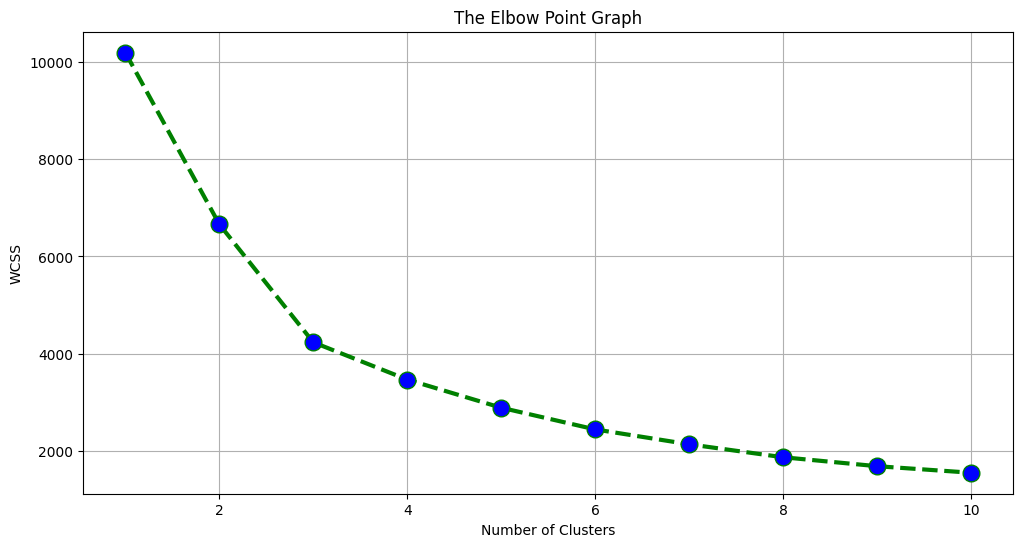

In [61]:
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11),wcss, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

In [62]:
kmeans= KMeans(n_clusters = 5, init = 'k-means++', random_state=133) #initialize the class object
label= kmeans.fit_predict(X) #returns a cluster number for each of the data points
print(label)

[2 1 1 ... 3 0 1]


In [45]:
print(kmeans.cluster_centers_)

[[0.01793759 0.81631338 0.17474548]
 [0.03499664 0.55459003 0.21686991]
 [0.01898876 0.75786377 0.46103067]
 [0.03938443 0.48451555 0.64373559]
 [0.03913083 0.26869625 0.24100109]]


In [63]:
X_predict

,monetary,usagehour,age,class
0,0.014149,0.782609,0.317073,3
1,0.001536,0.500000,0.353659,2
2,0.019661,0.565217,0.390244,2
3,0.007787,0.826087,0.341463,3
4,0.178014,0.434783,0.317073,2
...,...,...,...,...
122305,0.003949,0.434783,0.439024,4
122306,0.010804,0.217391,0.219512,5
122307,0.115824,0.228261,0.585366,4
122308,0.000494,0.913043,0.268293,1


In [46]:
X_predict = pd.DataFrame(X, columns = ['monetary', 'usagehour', 'age'])
X_predict = pd.concat([X_predict, pd.Series(label)], axis=1)
X_predict.rename(columns = {0:'class'}, inplace = True)
X_predict['class'] = X_predict['class'].replace([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])
X_predict

,monetary,usagehour,age,class
0,0.014149,0.782609,0.317073,3
1,0.001536,0.500000,0.353659,2
2,0.019661,0.565217,0.390244,2
3,0.007787,0.826087,0.341463,3
4,0.178014,0.434783,0.317073,2
...,...,...,...,...
122305,0.003949,0.434783,0.439024,4
122306,0.010804,0.217391,0.219512,5
122307,0.115824,0.228261,0.585366,4
122308,0.000494,0.913043,0.268293,1


In [64]:
X_predict['class'].value_counts()

2    38855
1    28294
3    21841
4    18895
5    14425
Name: class, dtype: int64

In [85]:
analytics_df = pd.concat([analytics_df, pd.Series(label)], axis=1)

#analytics_df = pd.DataFrame(analytics_df, columns = ['monetary', 'usagehour', 'age'])
#X_predict = pd.concat([X_predict, pd.Series(label)], axis=1)
analytics_df.rename(columns = {0:'class'}, inplace = True)
analytics_df['class'] = analytics_df['class'].replace([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])
analytics_df 

,CustomerID,Monetary,usagehour,age,class
0,A10002139,516,18.000000,31.000000,3
1,A10002478,56,11.500000,32.500000,2
2,A10002651,717,13.000000,34.000000,2
3,A10002984,284,19.000000,32.000000,3
4,A10003278,6492,10.000000,31.000000,2
...,...,...,...,...,...
122305,Z103337827,144,10.000000,36.000000,4
122306,Z103337999,394,5.000000,27.000000,5
122307,Z103338464,4224,5.250000,42.000000,4
122308,Z103340951,18,21.000000,29.000000,1


In [88]:
class1_id = analytics_df [analytics_df ['class'] == 1]['CustomerID']
class2_id = analytics_df [analytics_df ['class'] == 2]['CustomerID']
class3_id = analytics_df [analytics_df ['class'] == 3]['CustomerID']
class4_id = analytics_df [analytics_df ['class'] == 4]['CustomerID']
class5_id = analytics_df [analytics_df ['class'] == 5]['CustomerID']

In [90]:
#analytics_df['CustomerID'.isin]

print(analytics_df[analytics_df['CustomerID'].isin(class1_id)]['Monetary'].mean(), analytics_df[analytics_df['CustomerID'].isin(class1_id)]['usagehour'].mean(), analytics_df[analytics_df['CustomerID'].isin(class1_id)]['age'].mean())
print(analytics_df[analytics_df['CustomerID'].isin(class2_id)]['Monetary'].mean(), analytics_df[analytics_df['CustomerID'].isin(class2_id)]['usagehour'].mean(), analytics_df[analytics_df['CustomerID'].isin(class2_id)]['age'].mean())
print(analytics_df[analytics_df['CustomerID'].isin(class3_id)]['Monetary'].mean(), analytics_df[analytics_df['CustomerID'].isin(class3_id)]['usagehour'].mean(), analytics_df[analytics_df['CustomerID'].isin(class3_id)]['age'].mean())
print(analytics_df[analytics_df['CustomerID'].isin(class4_id)]['Monetary'].mean(), analytics_df[analytics_df['CustomerID'].isin(class4_id)]['usagehour'].mean(), analytics_df[analytics_df['CustomerID'].isin(class4_id)]['age'].mean())
print(analytics_df[analytics_df['CustomerID'].isin(class5_id)]['Monetary'].mean(), analytics_df[analytics_df['CustomerID'].isin(class5_id)]['usagehour'].mean(), analytics_df[analytics_df['CustomerID'].isin(class5_id)]['age'].mean())


654.3910016257864 18.764503527046138 25.145869170551965
1281.00872474585 12.739631004183057 26.87914327649698
688.6935122018223 17.429506003095778 36.83679206146179
1437.0853664990739 11.151898998623563 44.394979581542486
1425.7081455805892 6.176808590262537 27.88455221690433


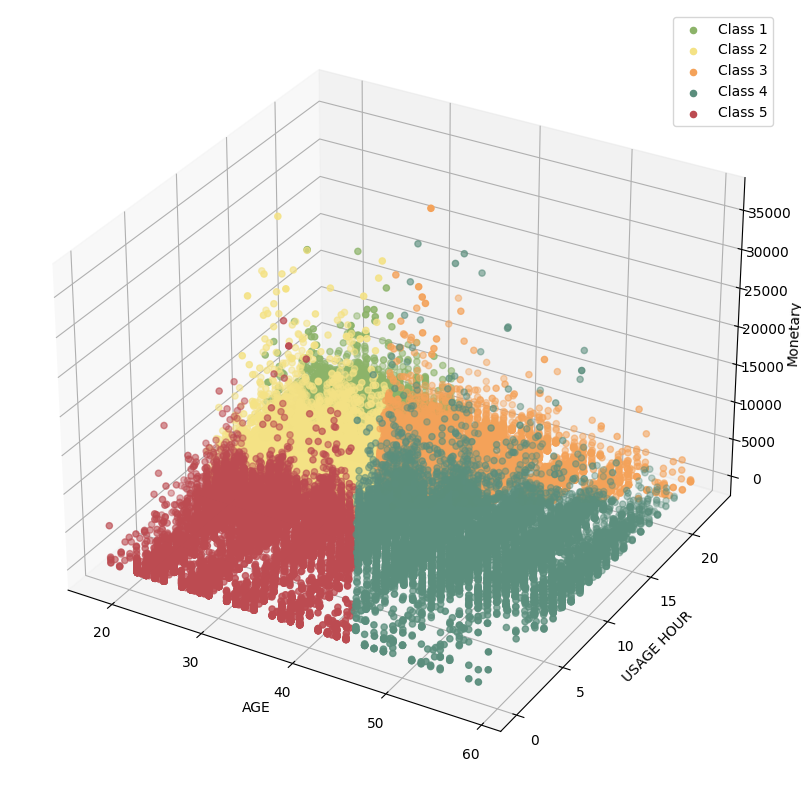

In [183]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(analytics_df[analytics_df['class'] == 1]['age'], analytics_df[analytics_df['class'] == 1]['usagehour'], analytics_df[analytics_df['class'] == 1]['Monetary'], label = 'Class 1', color = '#8CB369')
ax.scatter3D(analytics_df[analytics_df['class'] == 2]['age'], analytics_df[analytics_df['class'] == 2]['usagehour'], analytics_df[analytics_df['class'] == 2]['Monetary'], label = 'Class 2', color = '#F4E285')
ax.scatter3D(analytics_df[analytics_df['class'] == 3]['age'], analytics_df[analytics_df['class'] == 3]['usagehour'], analytics_df[analytics_df['class'] == 3]['Monetary'], label = 'Class 3', color = '#F4A259')
ax.scatter3D(analytics_df[analytics_df['class'] == 4]['age'], analytics_df[analytics_df['class'] == 4]['usagehour'], analytics_df[analytics_df['class'] == 4]['Monetary'], label = 'Class 4', color = '#5B8E7D')
ax.scatter3D(analytics_df[analytics_df['class'] == 5]['age'], analytics_df[analytics_df['class'] == 5]['usagehour'], analytics_df[analytics_df['class'] == 5]['Monetary'], label = 'Class 5', color = '#BC4B51')

ax.set_xlabel('AGE')
ax.set_ylabel('USAGE HOUR')
ax.set_zlabel('Monetary')
ax.legend()
plt.show()

In [91]:
attribute_df = df[['iRent_1', 'iRent_2', 'iRent_3', 'iRent_4', 'iRent_5']]
attribute_df.drop_duplicates(subset= 'iRent_1', inplace = True)
attribute_df.reset_index(drop =True, inplace =True)
attribute_df

/var/folders/5p/l1vljrjn45z85cmn9hgfwyfh0000gn/T/ipykernel_46876/1840758047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attribute_df.drop_duplicates(subset= 'iRent_1', inplace = True)


,iRent_1,iRent_2,iRent_3,iRent_4,iRent_5
0,A10002139,31-35,M,台北市,文山區
1,A10002478,31-35,M,台北市,中正區
2,A10002651,31-35,M,新北市,永和區
3,A10002984,31-35,M,台北市,文山區
4,A10003278,31-35,M,新北市,三重區
...,...,...,...,...,...
122305,Z103337827,36-40,F,新北市,土城區
122306,Z103337999,26-30,F,連江縣,莒光鄉
122307,Z103338464,41-45,F,新北市,新店區
122308,Z103340951,26-30,F,基隆市,七堵區


In [92]:
att_df_class1 = attribute_df[attribute_df['iRent_1'].isin(class1_id)]
att_df_class2 = attribute_df[attribute_df['iRent_1'].isin(class2_id)]
att_df_class3 = attribute_df[attribute_df['iRent_1'].isin(class3_id)]
att_df_class4 = attribute_df[attribute_df['iRent_1'].isin(class4_id)]
att_df_class5 = attribute_df[attribute_df['iRent_1'].isin(class5_id)]

In [113]:
att_df_class1['iRent_3'].value_counts(normalize=True)

M    0.617976
F    0.382024
Name: iRent_3, dtype: float64

In [95]:
att_df_class2['iRent_3'].value_counts(normalize=True)

M    0.600129
F    0.399871
Name: iRent_3, dtype: float64

In [96]:
att_df_class3['iRent_3'].value_counts(normalize=True)

M    0.659677
F    0.340323
Name: iRent_3, dtype: float64

In [97]:
att_df_class4['iRent_3'].value_counts(normalize=True)

M    0.714369
F    0.285631
Name: iRent_3, dtype: float64

In [98]:
att_df_class5['iRent_3'].value_counts(normalize=True)

M    0.667591
F    0.332409
Name: iRent_3, dtype: float64

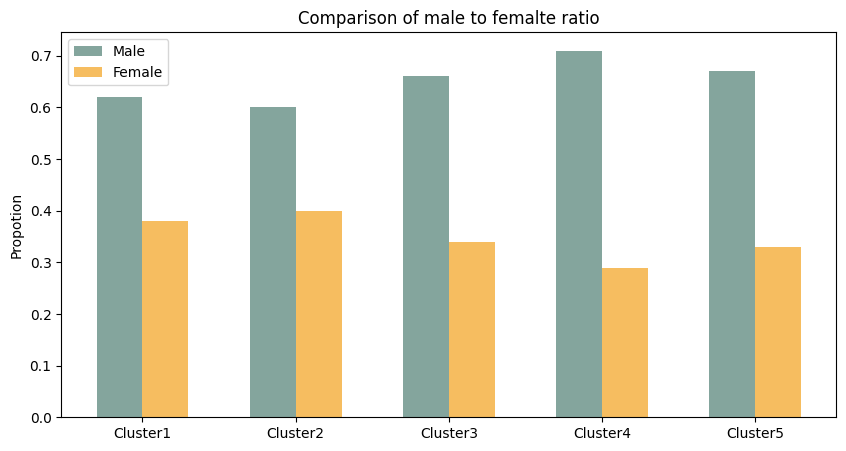

In [181]:
# Numbers of pairs of bars you want
N = 5

# Specify the values of blue bars (height)
blue_bar = (m1, m2, m3, m4, m5)
# Specify the values of orange bars (height)
orange_bar = (f1, f2, f3, f4, f5)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3 

# Plotting
plt.bar(ind, blue_bar , width, label='Male', color = '#84A59D')
plt.bar(ind + width, orange_bar, width, label='Female' , color = '#F6BD60')

#plt.xlabel('Here goes x-axis label')
plt.ylabel('Propotion')
plt.title('Comparison of male to femalte ratio')

# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [157]:
att_df_class1['iRent_4'].value_counts(normalize=True)[0:5]


新北市    0.288683
台北市    0.197674
台中市    0.125009
桃園市    0.099173
高雄市    0.083339
Name: iRent_4, dtype: float64

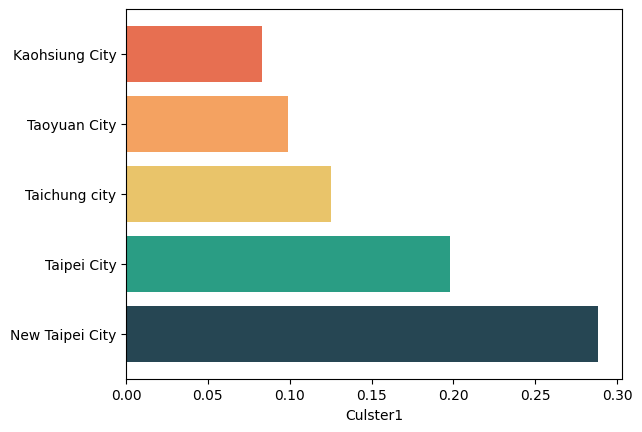

In [169]:
x = [1,2,3,4,5]        # 水平資料點
h = att_df_class1['iRent_4'].value_counts(normalize=True)[0:5]   # 高度
color = ['#264653','#2A9D84','#E9C46A','#F4A261','#E76F51']
label = ['New Taipei City', 'Taipei City', 'Taichung city', 'Taoyuan City', 'Kaohsiung City']
plt.barh(x,h, color = color, tick_label = label)
plt.xlabel('Culster1')
plt.show()

In [172]:
att_df_class2['iRent_4'].value_counts(normalize=True)[0:5]

新北市    0.292961
台北市    0.218530
台中市    0.116639
桃園市    0.095277
高雄市    0.080170
Name: iRent_4, dtype: float64

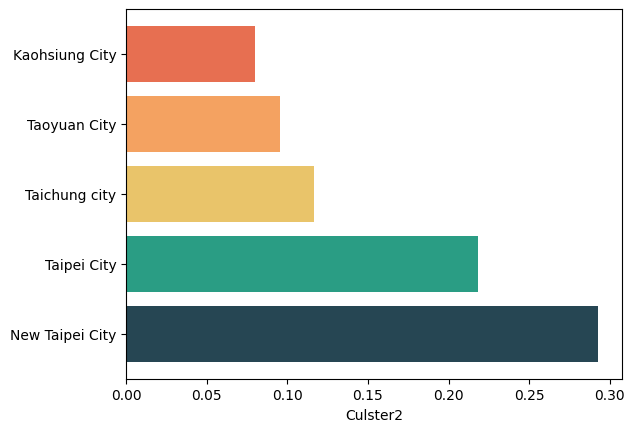

In [174]:
x = [1,2,3,4,5]        # 水平資料點
h = att_df_class2['iRent_4'].value_counts(normalize=True)[0:5]   # 高度
color = ['#264653','#2A9D84','#E9C46A','#F4A261','#E76F51']
label = ['New Taipei City', 'Taipei City', 'Taichung city', 'Taoyuan City', 'Kaohsiung City']
plt.barh(x,h, color = color, tick_label = label)
plt.xlabel('Culster2')
plt.show()

In [175]:
att_df_class3['iRent_4'].value_counts(normalize=True)[0:5]   # 高度

新北市    0.327320
台北市    0.268120
台中市    0.100407
高雄市    0.076324
台南市    0.076324
Name: iRent_4, dtype: float64

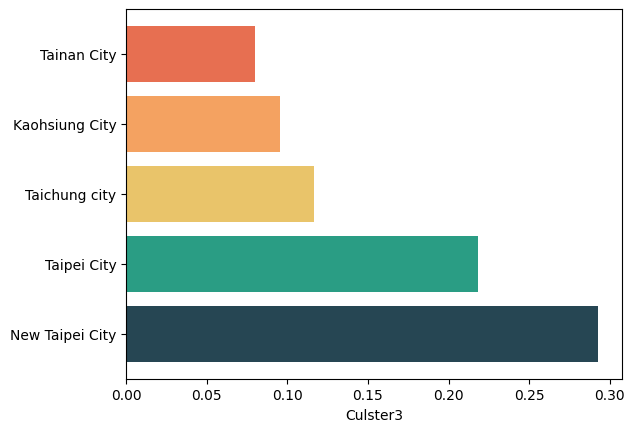

In [176]:
x = [1,2,3,4,5]        # 水平資料點
h = att_df_class2['iRent_4'].value_counts(normalize=True)[0:5]   # 高度
color = ['#264653','#2A9D84','#E9C46A','#F4A261','#E76F51']
label = ['New Taipei City', 'Taipei City', 'Taichung city', 'Kaohsiung City', 'Tainan City']
plt.barh(x,h, color = color, tick_label = label)
plt.xlabel('Culster3')
plt.show()

In [177]:
att_df_class4['iRent_4'].value_counts(normalize=True)[0:5]

新北市    0.349616
台北市    0.318497
台中市    0.077057
桃園市    0.072559
高雄市    0.067796
Name: iRent_4, dtype: float64

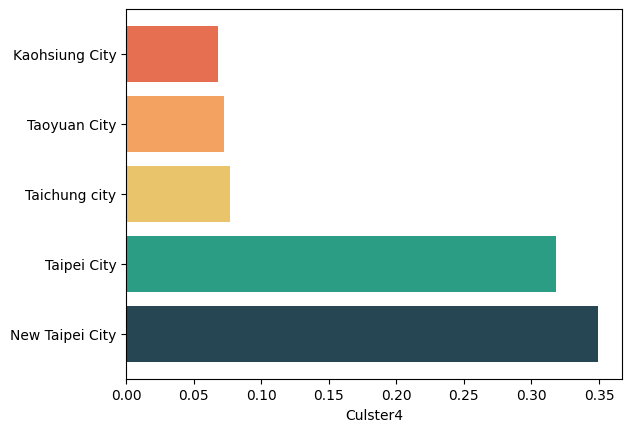

In [178]:
x = [1,2,3,4,5]        # 水平資料點
h = att_df_class4['iRent_4'].value_counts(normalize=True)[0:5]   # 高度
color = ['#264653','#2A9D84','#E9C46A','#F4A261','#E76F51']
label = ['New Taipei City', 'Taipei City', 'Taichung city', 'Taoyuan City', 'Kaohsiung City']
plt.barh(x,h, color = color, tick_label = label)
plt.xlabel('Culster4')
plt.show()

In [179]:
att_df_class5['iRent_4'].value_counts(normalize=True)[0:5]

新北市    0.338094
台北市    0.220728
台中市    0.102461
桃園市    0.094419
高雄市    0.072582
Name: iRent_4, dtype: float64

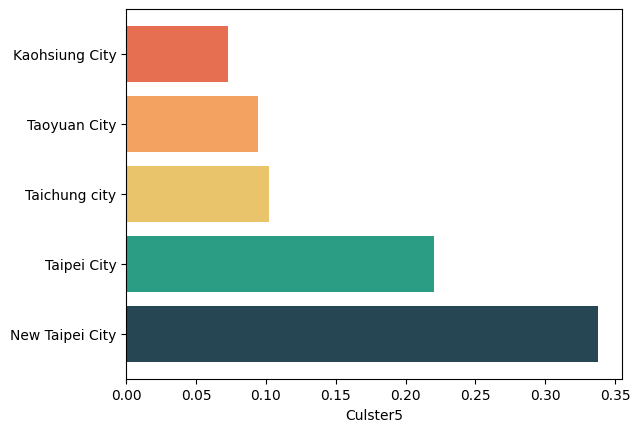

In [180]:
x = [1,2,3,4,5]        # 水平資料點
h = att_df_class5['iRent_4'].value_counts(normalize=True)[0:5]   # 高度
color = ['#264653','#2A9D84','#E9C46A','#F4A261','#E76F51']
label = ['New Taipei City', 'Taipei City', 'Taichung city', 'Taoyuan City', 'Kaohsiung City']
plt.barh(x,h, color = color, tick_label = label)
plt.xlabel('Culster5')
plt.show()

In [49]:
analytics_df[analytics_df['class'] == 0]['Monetary']

0          516
3          284
22          27
30           0
39         108
          ... 
122289    1307
122292    1797
122295     258
122296    4300
122308      18
Name: Monetary, Length: 26486, dtype: int64

In [43]:
analytics_df['age']

0         31.000000
1         32.500000
2         34.000000
3         32.000000
4         31.000000
            ...    
122305    36.000000
122306    27.000000
122307    42.000000
122308    29.000000
122309    22.652174
Name: age, Length: 122310, dtype: float64